# Base example

to get started:


In [1]:
import portofolio as porto
porto.set_client_dir()

A few folders should have been created in your source directory
    1. client data
        a) accounts - where all your account information will be stored (transactions and cash)
        b) data - price and fx data will be stored and retreived from that location
        c) outputs - reporting html files will be saved there
    2. config
        a) a default config file has been created, api keys for the selected source needs to be entered

Creating a new portfolio

In [2]:
portfolio = porto.Portfolio(account='Example', currency="CAD")
portfolio.reset()

In [3]:
print(portfolio.transactions)
print(portfolio.cash_history)
print(portfolio)


Empty DataFrame
Columns: [Ticker, Type, Quantity, Price, Fees, Currency]
Index: []
Series([], dtype: float64)
Example


Now we want to add a transaction

In [4]:
from datetime import datetime

transaction = porto.Transaction(date=datetime(2022, 1, 31),
                                ticker="AAPL",
                                type="Buy",
                                quantity=10,
                                price=160.,
                                fees=5.,
                                currency="USD")

portfolio.add_transaction([transaction])


ERROR:root:Example: transaction not added. not enough funds to perform this transaction, missing 2046.4560317993164 to complete


We need to have funds to perform transactions

In [5]:
portfolio.add_cash_change(date=datetime(2022, 1, 1), direction="deposit", amount=1_000_000)

In [6]:
portfolio.cash()

1000000

Now we can add a transaction

In [7]:
portfolio.add_transaction(transaction)

In [8]:
portfolio.positions.get('AAPL').quantities

2022-01-31    10.0
2022-02-01    10.0
2022-02-02    10.0
2022-02-03    10.0
2022-02-04    10.0
2022-02-07    10.0
2022-02-08    10.0
2022-02-09    10.0
2022-02-10    10.0
2022-02-11    10.0
2022-02-14    10.0
2022-02-15    10.0
2022-02-16    10.0
2022-02-17    10.0
2022-02-18    10.0
2022-02-22    10.0
2022-02-23    10.0
2022-02-24    10.0
2022-02-25    10.0
2022-02-28    10.0
2022-03-01    10.0
2022-03-02    10.0
2022-03-03    10.0
2022-03-04    10.0
Name: qty, dtype: float64

In [9]:
print(portfolio)

Example


In [10]:
portfolio.update_data()

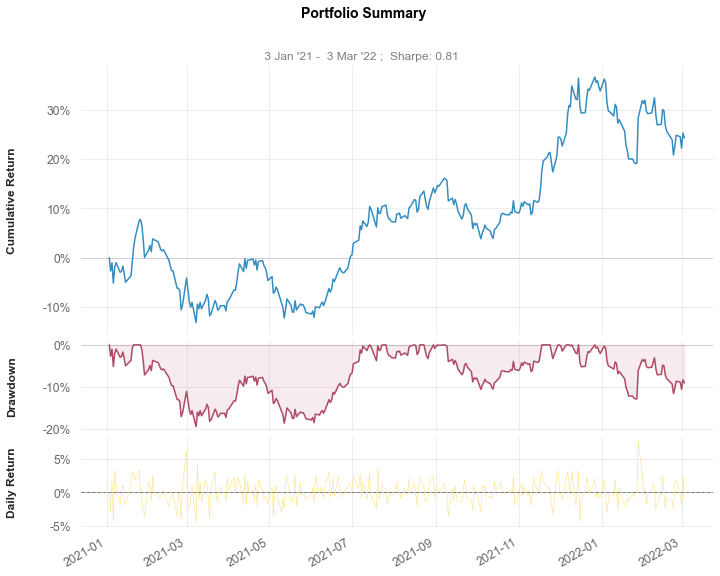

In [11]:
ret = portfolio.positions.get('AAPL').prices.pct_change().loc[datetime(2021, 1, 1):]

import quantstats as qs

qs.plots.snapshot(ret)

Using the position object on its own makes easy access to prices. Note that the currency argument is only specifying the local currency of the prices for the portfolio context.

2912.820068359375
1


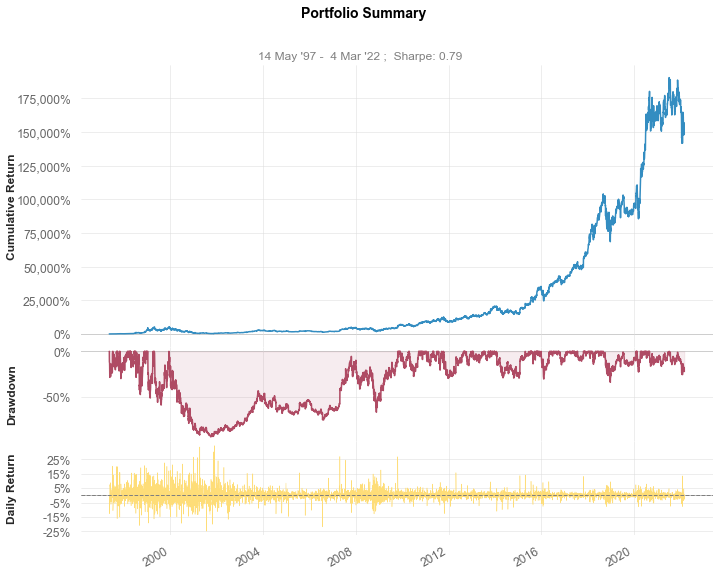

In [12]:
p = porto.Position("AMZN", "USD")
print(p.prices.iloc[-1])
print(p.quantities.iloc[-1])
qs.plots.snapshot(p.prices.pct_change())

In [13]:
p.get_fundamentals('balance_sheet').iloc[0]

2021-12-31    5107000000
2020-12-31    4981000000
2019-12-31    4049000000
2018-12-31    4110000000
Name: intangibleAssets, dtype: int64